We are comparing the difference using preview or original quality for the face
clustering task.

folder size: 

* Original:     14.3 GB
* Preview:      778.6 MB


Face extracted:

| Quality | nb faces extracted | nb of face keept | 
| --- | --- | --- |
| Original | 20523 | 6063 |
| Preview | 20740 | 4625 |

In [20]:
size_original = 14.3 # GB
size_original = size_original * 1024
size_preview = 778.6 # MB

# how many time large is the preview compared to the original
size_original / size_preview

18.807089648086308

In [9]:
from deepface.detectors import (
    OpenCvWrapper,
    SsdWrapper,
    DlibWrapper,
    MtcnnWrapper,
    RetinaFaceWrapper,
    MediapipeWrapper,
    FaceDetector,
)
from time import perf_counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
import pathlib
import pandas as pd

# impact on face detection

## distribution

In [10]:
# import dataset/fullsize/df/confidences.csv
df_original = pd.read_csv("dataset/fullsize/df/confidences.csv")
df_preview = pd.read_csv("dataset/preview/df/confidences.csv")

Text(0, 0.5, 'Number of Faces detected')

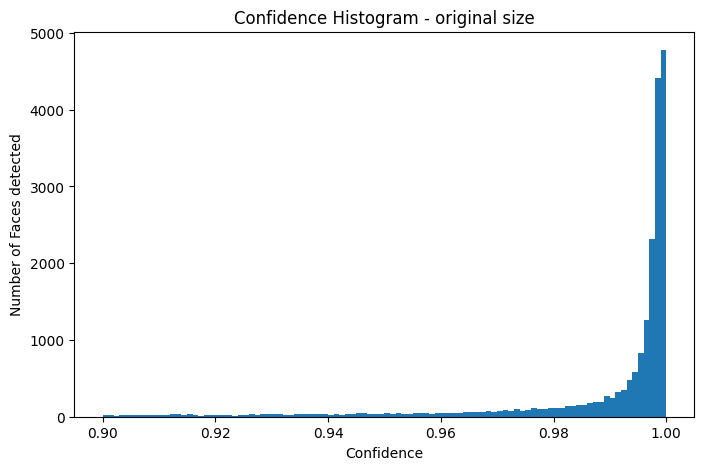

In [17]:
ax = df_original["confidence"].plot.hist(bins=100, title="Confidence Histogram - original size", figsize=(8, 5))
ax.set_xlabel("Confidence")
ax.set_ylabel("Number of Faces detected")

Text(0, 0.5, 'Number of Faces detected')

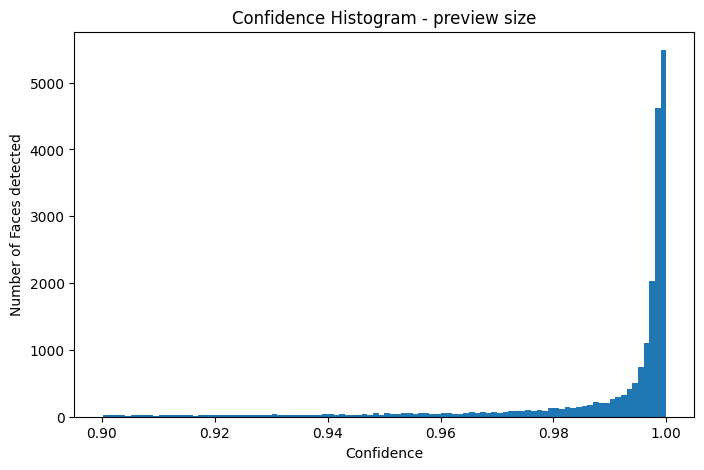

In [18]:
ax = df_preview["confidence"].plot.hist(bins=100, title="Confidence Histogram - preview size", figsize=(8, 5))
ax.set_xlabel("Confidence")
ax.set_ylabel("Number of Faces detected")

## helper function

In [10]:
from helper.face_detector import draw_bounding_boxes

backends = {
    "opencv": OpenCvWrapper.detect_face,
    "ssd": SsdWrapper.detect_face,
    "dlib": DlibWrapper.detect_face,
    "mtcnn": MtcnnWrapper.detect_face,
    "retinaface": RetinaFaceWrapper.detect_face,
    "mediapipe": MediapipeWrapper.detect_face,
}

def compare_face_detection_quality(img_name: str, detector_backend="retinaface") -> dict:
    """
    Compare the face dectection on a given image: preview vs original quality
    """
    # 3x2 grid of images
    fig, _axs = plt.subplots(1, 2, figsize=(10, 10))
    axs = _axs.flatten()
    fig.tight_layout()

    img_original_path = pathlib.Path("dataset/img_fullsize") / img_name
    img_preview_path = pathlib.Path("dataset/img_preview") / img_name

    img_original_bgr = cv2.imread(str(img_original_path))
    img_preview_bgr = cv2.imread(str(img_preview_path))

    detect_face = backends.get(detector_backend)
    face_detector = FaceDetector.build_model(detector_backend)


    obj_preview = detect_face(face_detector, img_preview_bgr, align=True)
    obj_original = detect_face(face_detector, img_original_bgr, align=True)

    img_original_h, img_original_w, _ = img_original_bgr.shape
    img_original_size = img_original_path.stat().st_size # in bytes
    title = f"Original - {img_original_h}x{img_original_w} - {img_original_size/1024:.1f}KB"
    axs[0].set_title(title)
    draw_bounding_boxes(img_original_bgr, obj_original, ax=axs[0])


    img_preview_h, img_preview_w, _ = img_preview_bgr.shape
    img_preview_size = img_preview_path.stat().st_size # in bytes
    title = f"Preview - {img_preview_h}x{img_preview_w} - {img_preview_size/1024:.1f}KB"
    axs[1].set_title(title)
    draw_bounding_boxes(img_preview_bgr, obj_preview, ax=axs[1])

## examples

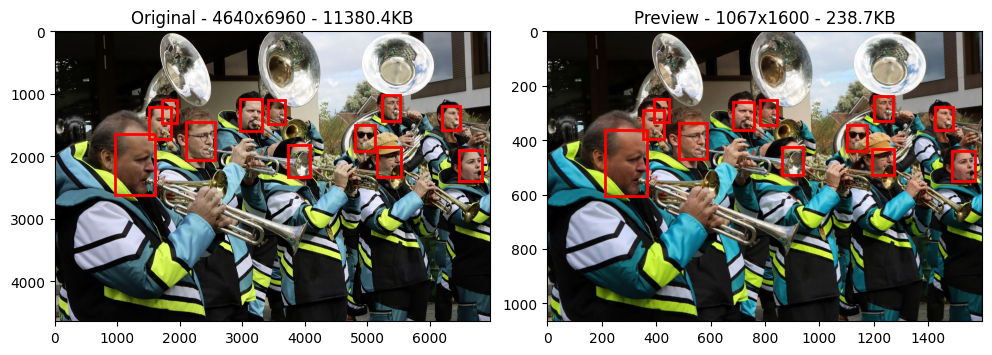

In [11]:
img_name = "0_o6Geo0q5_8cF7PNY_Os7.jpg"
compare_face_detection_quality(img_name)

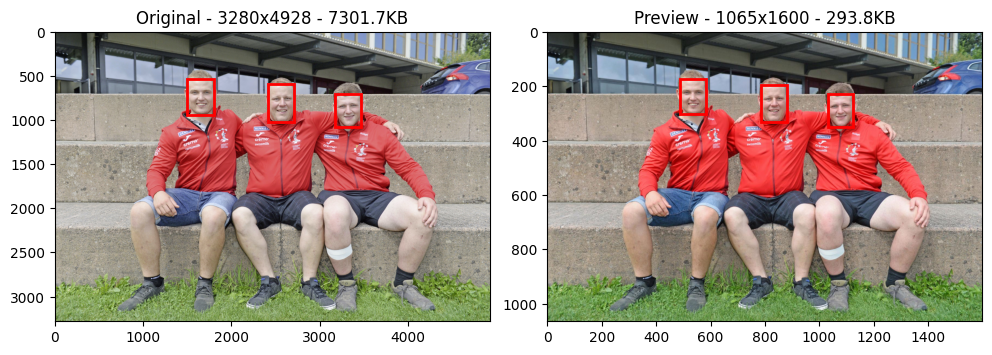

In [4]:
img_name = "EuBGFSXo4PwBoznhQk4v5N.jpg"
compare_face_detection_quality(img_name)

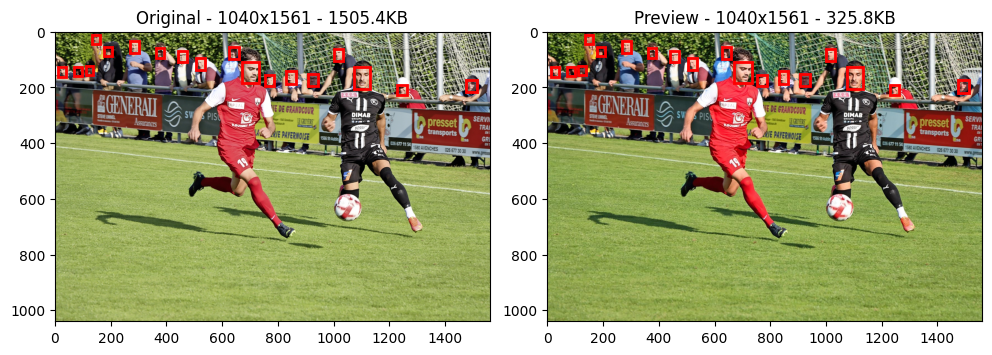

In [5]:
img_name = "0ehpyBTBKMZ9mtLUA4FjzI.jpg"
compare_face_detection_quality(img_name)

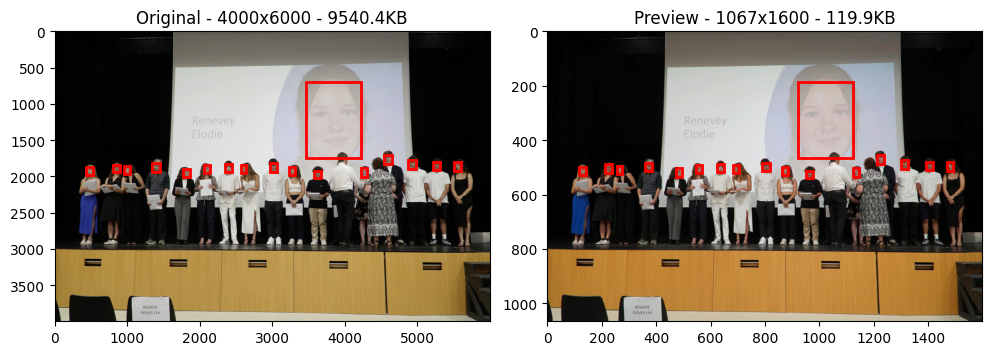

In [6]:
img_name = "0cmd7xCnqiHBTZbFAe3b-k.jpg"
compare_face_detection_quality(img_name)

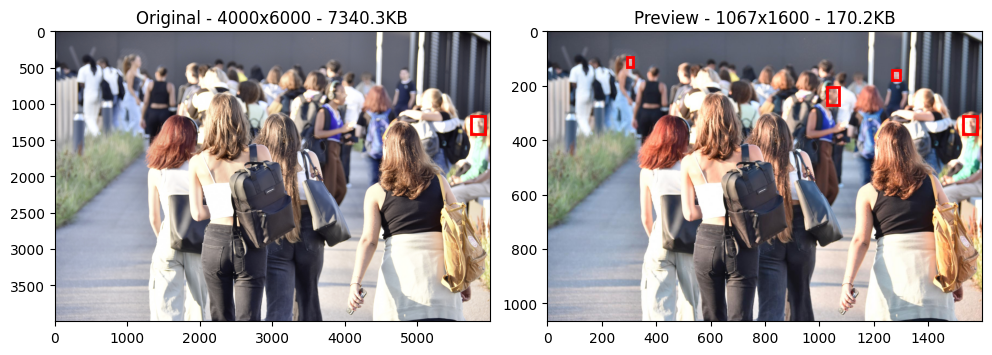

In [7]:
compare_face_detection_quality("Ez2TRtoOq1iAn3wr8vTYvV.jpg")

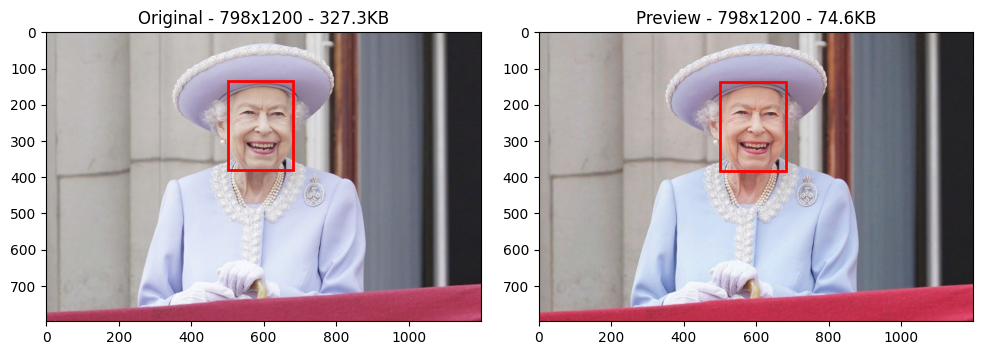

In [18]:
compare_face_detection_quality("1wBlltV8K9m8vFaKMe2wF6.jpg")

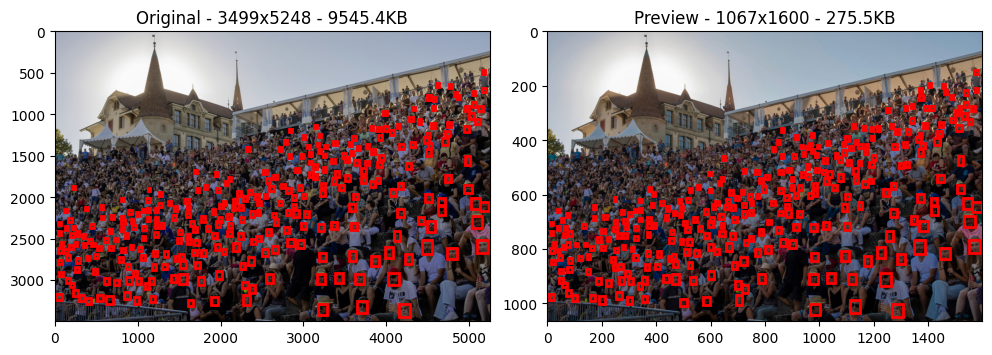

In [10]:
compare_face_detection_quality("1w40VJwGKGCA9u0R6w7ECY.jpg")

# impact on blur detection / filtering

In [1]:
from blur_detection.blur_detection import compare_blur_detection, compare_blur_detection_quality

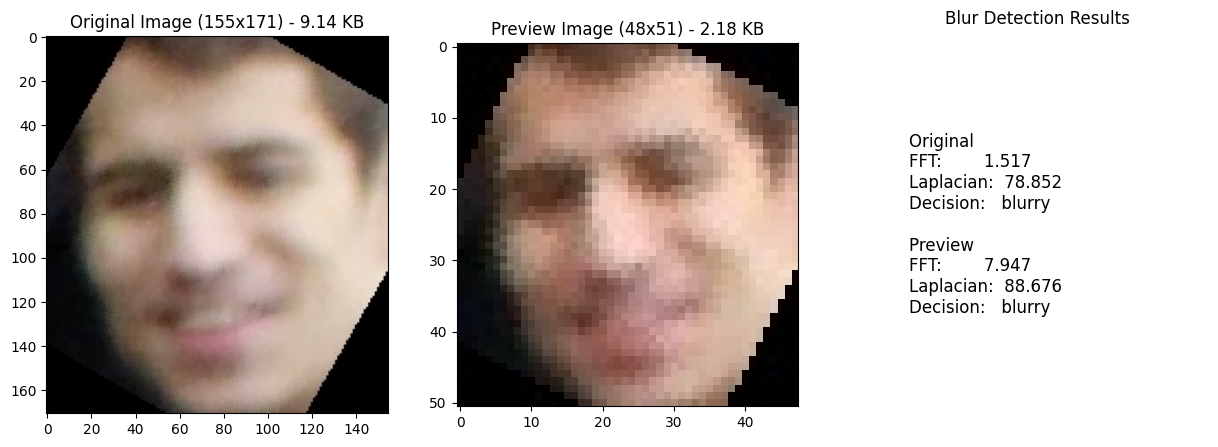

In [2]:
compare_blur_detection_quality("0DpWZ7_Iq6Q9g8TgaYxRxP_f6.jpg")

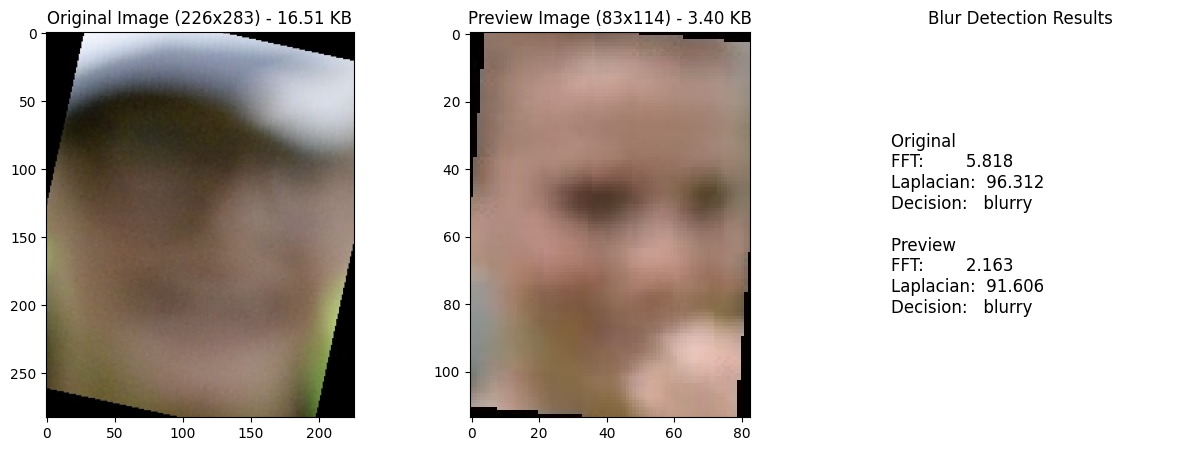

In [3]:
compare_blur_detection_quality("FmTY6dyL4s0Bs1_QqGCkLU_f2.jpg")

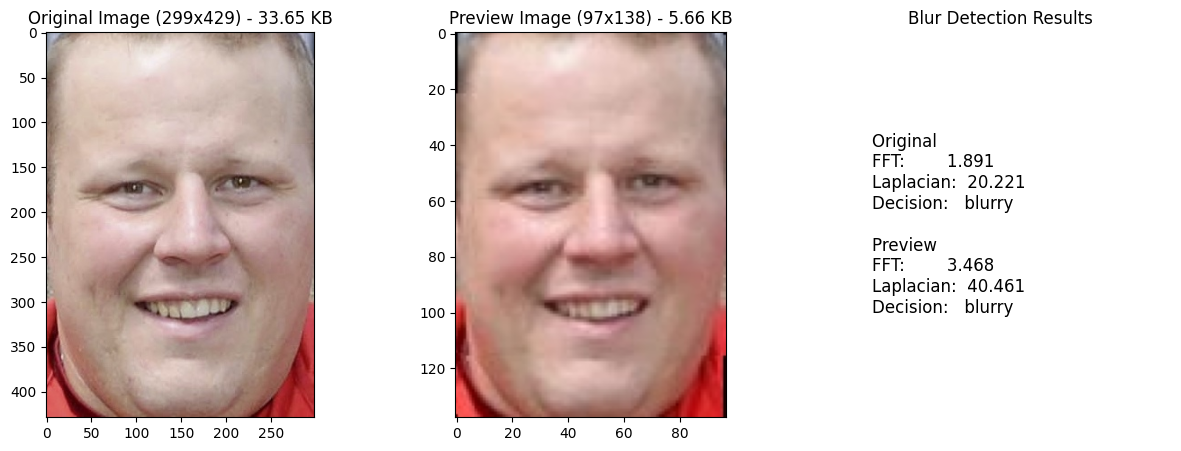

In [4]:
compare_blur_detection_quality("EuBGFSXo4PwBoznhQk4v5N_f2.jpg")

We may want to lower even more the threshold for blur detection in "lower"
resolution images.

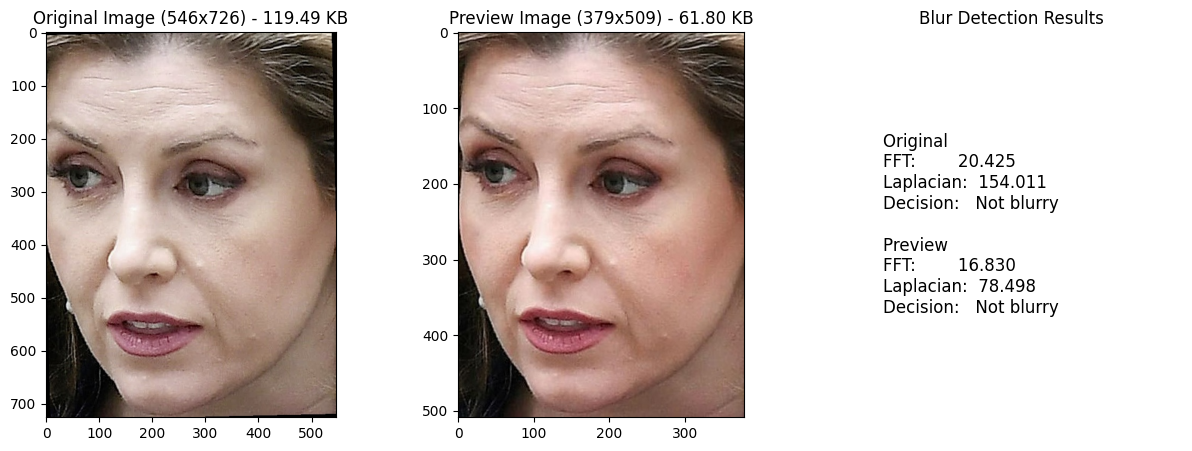

In [5]:
compare_blur_detection_quality("0_-M9l7X4fzA-gSGd--qsI_f0.jpg")

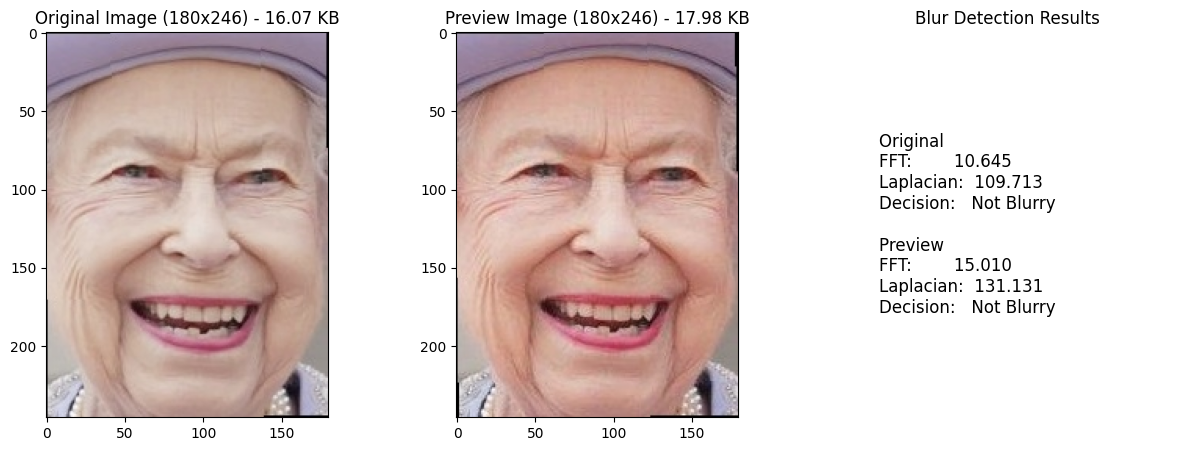

In [6]:
compare_blur_detection_quality("1wBlltV8K9m8vFaKMe2wF6_f0.jpg")